In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set()

In [14]:
base_path = "data/datagen"
ballot_base_path = f"{base_path}/ballot"
gen_data_base_path = f"{base_path}/gen_data"
reg_data_base_path = f"{base_path}/reg_data"

data_path = f"{base_path}/data.csv"

In [17]:
n_runs = 1000

# Ballots

In [18]:
dfs_arr = []
for i in tqdm(range(n_runs)):
    curr_df = pd.read_csv(f"{ballot_base_path}/ballots_{i}.csv")
    curr_df["run"] = i
    dfs_arr.append(curr_df)

ballots_df = pd.concat(dfs_arr, axis=0, ignore_index=True)
ballots_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.36it/s]


,party,votes,is_ind,region,run
0,party_1,489507,False,ec,0
1,party_2,24349,False,ec,0
2,party_3,9522,False,ec,0
3,party_4,5950,False,ec,0
4,party_5,341,False,ec,0


fig, ax = plt.subplot(1, figsize=(7, 7))


In [20]:
ballots_df[ballots_df["is_ind"]==True]

,party,votes,is_ind,region,run
44,ind_1,17413,True,ec,0
45,ind_2,23241,True,ec,0
46,ind_3,0,True,ec,0
47,ind_4,14848,True,ec,0
48,ind_5,9309,True,ec,0
...,...,...,...,...,...
432814,ind_2,0,True,wc,999
432815,ind_3,0,True,wc,999
432816,ind_4,0,True,wc,999
432817,ind_5,0,True,wc,999


# Gen Data

In [19]:
dfs_arr = []
for i in tqdm(range(n_runs)):
    curr_df = pd.read_csv(f"{gen_data_base_path}/gen_data_{i}.csv")
    curr_df["run"] = i
    dfs_arr.append(curr_df)

gen_data_df = pd.concat(dfs_arr, axis=0, ignore_index=True)
gen_data_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 175.20it/s]


,is_large_parties,n_parties,n_large_parties,act_n_inds,run
0,True,49,3,8,0
1,True,46,5,13,1
2,True,30,6,12,2
3,True,51,2,8,3
4,True,46,1,9,4


<Axes: xlabel='act_n_inds', ylabel='Density'>

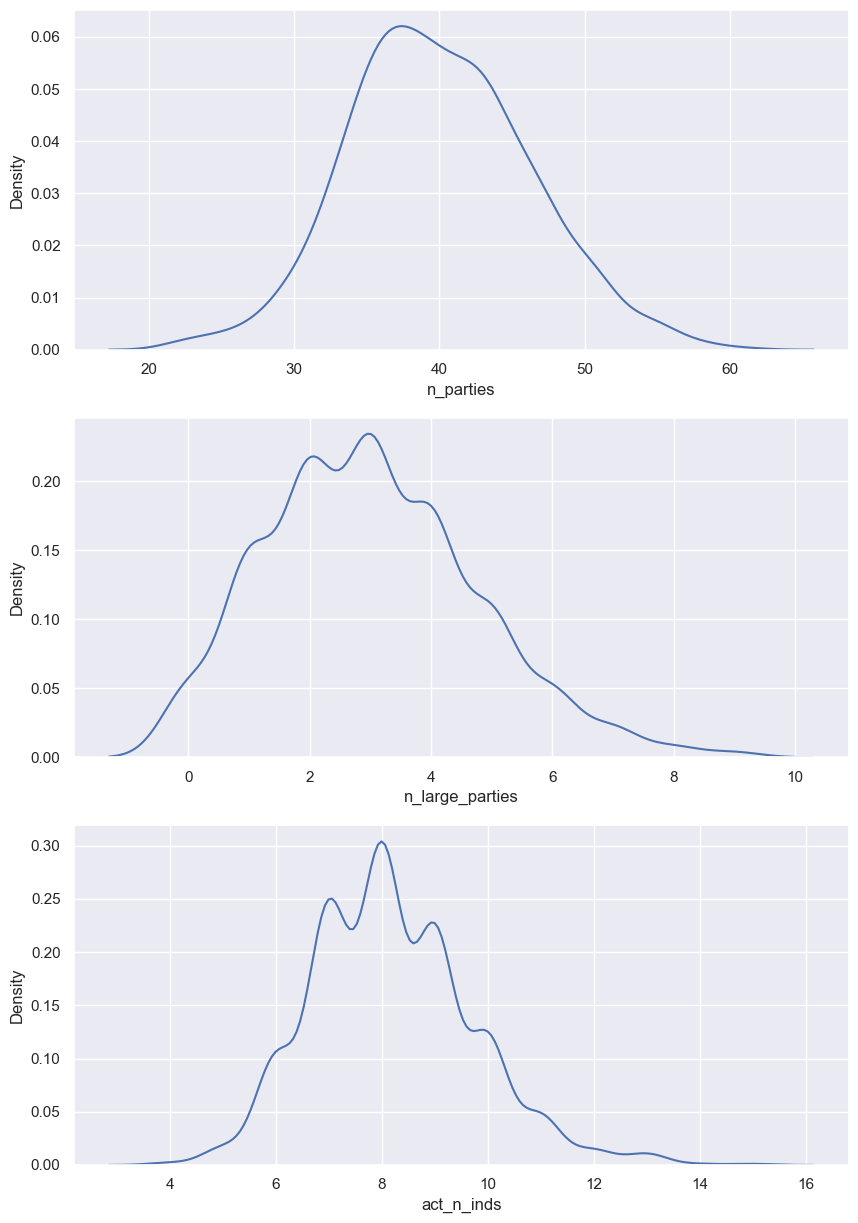

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
sns.kdeplot(gen_data_df, x="n_parties", ax=axs[0])
sns.kdeplot(gen_data_df, x="n_large_parties", ax=axs[1])
sns.kdeplot(gen_data_df, x="act_n_inds", ax=axs[2])

# Reg Data

In [62]:
dfs_arr = []
for i in tqdm(range(n_runs)):
    curr_df = pd.read_csv(f"{reg_data_base_path}/reg_data_{i}.csv")
    curr_df["run"] = i
    dfs_arr.append(curr_df)

reg_data_df = pd.concat(dfs_arr, axis=0, ignore_index=True)
reg_data_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 622.53it/s]


,reg,eff_n_inds,seats,votes,vote_turnout,perc_party_votes,perc_large_votes,run
0,nw,4,13,341243,0.622902,0.711003,0.706057,0
1,lp,4,19,769667,0.694214,0.645248,0.848301,0
2,wc,6,23,987121,0.618240,0.952820,0.925567,0
3,mp,4,15,599334,0.731389,0.923363,0.981150,0
4,gp,5,48,2634079,0.742943,0.809780,0.937275,0


In [78]:
reg_data_df.describe()

,eff_n_inds,seats,votes,vote_turnout,perc_party_votes,perc_large_votes,run
count,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,8532.000000,9000.000000
mean,5.009778,22.222222,2.610448e+03,0.661134,0.833220,0.859458,499.500000
std,2.005414,13.315542,4.842389e+04,0.099576,0.086794,0.079579,288.691029
min,1.000000,5.000000,0.000000e+00,0.255897,0.463222,0.530620,0.000000
25%,4.000000,13.000000,0.000000e+00,0.593612,0.775787,0.807297,249.750000
50%,5.000000,19.000000,0.000000e+00,0.662058,0.838903,0.867053,499.500000
75%,6.000000,25.000000,0.000000e+00,0.729642,0.899175,0.921546,749.250000
max,15.000000,48.000000,2.634079e+06,0.986784,0.989843,0.989945,999.000000


In [74]:
reg_data_df.groupby("reg").describe().T

reg                                ec             fs            gp  \
eff_n_inds       count    1000.000000    1000.000000  1.000000e+03   
                 mean        4.969000       5.117000  4.954000e+00   
                 std         2.017947       1.960396  2.017413e+00   
                 min         1.000000       1.000000  1.000000e+00   
                 25%         3.000000       4.000000  4.000000e+00   
                 50%         5.000000       5.000000  5.000000e+00   
                 75%         6.000000       6.000000  6.000000e+00   
                 max        12.000000      12.000000  1.300000e+01   
seats            count    1000.000000    1000.000000  1.000000e+03   
                 mean       25.000000      11.000000  4.800000e+01   
                 std         0.000000       0.000000  0.000000e+00   
                 min        25.000000      11.000000  4.800000e+01   
                 25%        25.000000      11.000000  4.800000e+01   
                 50%        25.000000      11.000000  4.800000e+01   
                 75%        25.000000      11.000000  4.800000e+01   
                 max        25.000000      11.000000  4.800000e+01   
votes            count    1000.000000    1000.000000  1.000000e+03   
                 mean     2009.404000    1189.202000  9.009196e+03   
                 std     29967.184827   17839.313658  1.198985e+05   
                 min         0.000000       0.000000  0.000000e+00   
                 25%         0.000000       0.000000  0.000000e+00   
                 50%         0.000000       0.000000  0.000000e+00   
                 75%         0.000000       0.000000  0.000000e+00   
                 max    677205.000000  471795.000000  2.634079e+06   
vote_turnout     count    1000.000000    1000.000000  1.000000e+03   
                 mean        0.658932       0.660223  6.585519e-01   
                 std         0.099829       0.099599  9.784021e-02   
                 min         0.255897       0.331429  3.003762e-01   
                 25%         0.594633       0.587368  5.951337e-01   
                 50%         0.659984       0.659997  6.590133e-01   
                 75%         0.727113       0.730798  7.225971e-01   
                 max         0.945184       0.986784  9.818762e-01   
perc_party_votes count    1000.000000    1000.000000  1.000000e+03   
                 mean        0.829121       0.833819  8.330984e-01   
                 std         0.089536       0.089279  8.740571e-02   
                 min         0.551585       0.463222  5.565756e-01   
                 25%         0.769882       0.779746  7.699642e-01   
                 50%         0.837221       0.839715  8.389343e-01   
                 75%         0.895307       0.900046  8.989197e-01   
                 max         0.989414       0.989759  9.895450e-01   
perc_large_votes count     948.000000     948.000000  9.480000e+02   
                 mean        0.863543       0.865396  8.586690e-01   
                 std         0.077119       0.074891  8.157410e-02   
                 min         0.601935       0.530620  5.824630e-01   
                 25%         0.812017       0.815073  8.004519e-01   
                 50%         0.870598       0.869743  8.644961e-01   
                 75%         0.924509       0.927960  9.249363e-01   
                 max         0.989945       0.989223  9.897949e-01   
run              count    1000.000000    1000.000000  1.000000e+03   
                 mean      499.500000     499.500000  4.995000e+02   
                 std       288.819436     288.819436  2.888194e+02   
                 min         0.000000       0.000000  0.000000e+00   
                 25%       249.750000     249.750000  2.497500e+02   
                 50%       499.500000     499.500000  4.995000e+02   
                 75%       749.250000     749.250000  7.492500e+02   
                 max       999.000000     999.000000  9.990000e+02   

reg      

Text(0.5, 1.0, 'perc_large_votes')

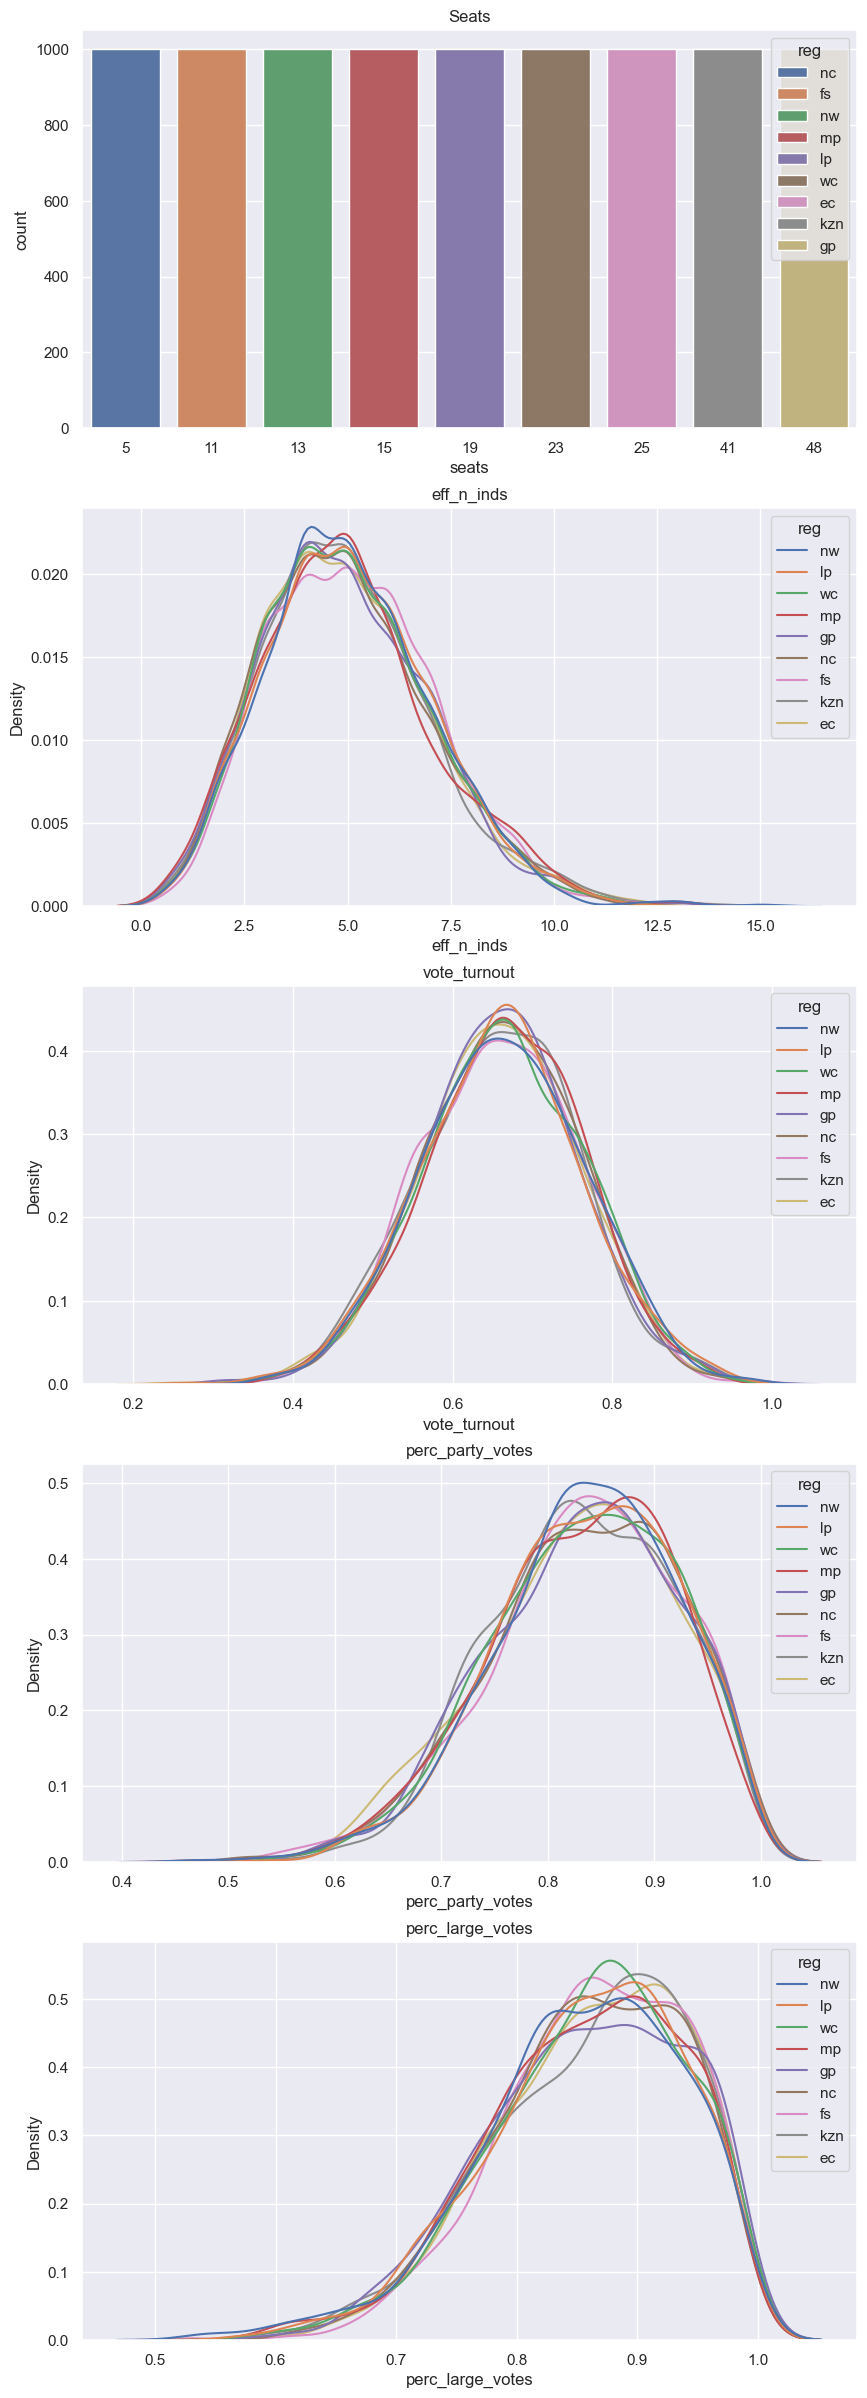

In [73]:
n_rows = 5
fig, axs = plt.subplots(n_rows, 1, figsize=(10, 6*n_rows))
sns.countplot(reg_data_df, x="seats", hue="reg", ax=axs[0])
axs[0].set_title("Seats")

sns.kdeplot(reg_data_df, x="eff_n_inds", hue="reg", ax=axs[1])
axs[1].set_title("eff_n_inds")

sns.kdeplot(reg_data_df, x="vote_turnout", hue="reg", ax=axs[2])
axs[2].set_title("vote_turnout")

sns.kdeplot(reg_data_df, x="perc_party_votes", hue="reg", ax=axs[3])
axs[3].set_title("perc_party_votes")

sns.kdeplot(reg_data_df, x="perc_large_votes", hue="reg", ax=axs[4])
axs[4].set_title("perc_large_votes")

<Axes: xlabel='seats', ylabel='count'>

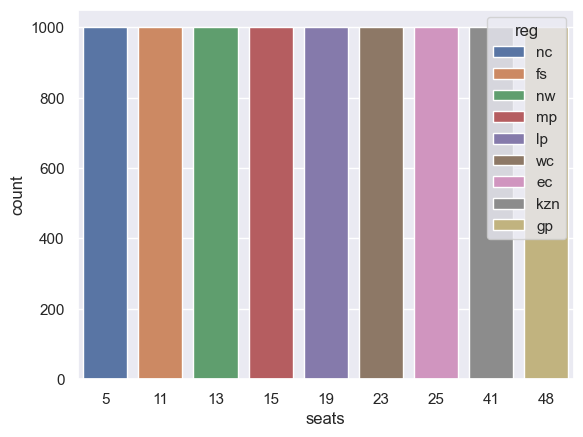

In [63]:
sns.countplot(reg_data_df, x="seats", hue="reg")

(0.0, 100000.0)

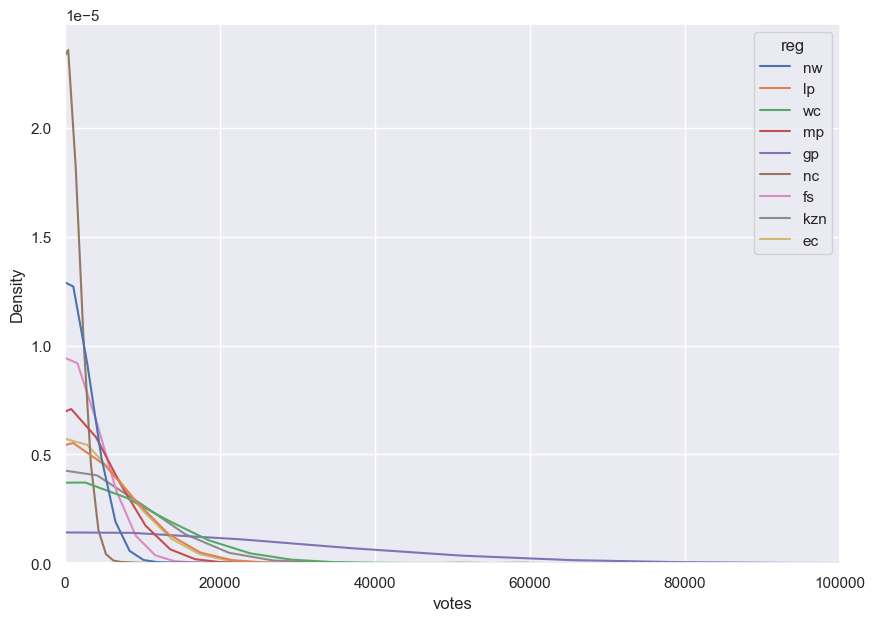

In [64]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.kdeplot(reg_data_df, x="votes", hue="reg", ax=ax)
# sns.boxplot(reg_data_df, y="votes", hue="reg", ax=ax, showfliers=False)
ax.set_xlim(0, 100000)


In [52]:
reg_data_df.groupby("reg").describe().T

reg                                ec             fs            gp  \
seats            count    1000.000000    1000.000000  1.000000e+03   
                 mean       25.000000      11.000000  4.800000e+01   
                 std         0.000000       0.000000  0.000000e+00   
                 min        25.000000      11.000000  4.800000e+01   
                 25%        25.000000      11.000000  4.800000e+01   
                 50%        25.000000      11.000000  4.800000e+01   
                 75%        25.000000      11.000000  4.800000e+01   
                 max        25.000000      11.000000  4.800000e+01   
votes            count    1000.000000    1000.000000  1.000000e+03   
                 mean     3134.117000    1151.080000  5.870265e+03   
                 std     43163.991343   16505.689453  8.818171e+04   
                 min         0.000000       0.000000  0.000000e+00   
                 25%         0.000000       0.000000  0.000000e+00   
                 50%         0.000000       0.000000  0.000000e+00   
                 75%         0.000000       0.000000  0.000000e+00   
                 max    957633.000000  388825.000000  2.117373e+06   
vote_turnout     count    1000.000000    1000.000000  1.000000e+03   
                 mean        0.661370       0.659635  6.575289e-01   
                 std         0.098166       0.094828  9.851845e-02   
                 min         0.331446       0.309114  3.303125e-01   
                 25%         0.597448       0.598611  5.902432e-01   
                 50%         0.658991       0.659110  6.563290e-01   
                 75%         0.729080       0.720548  7.235816e-01   
                 max         0.961286       0.952214  9.798110e-01   
perc_party_votes count    1000.000000    1000.000000  1.000000e+03   
                 mean        0.836216       0.837535  8.337983e-01   
                 std         0.085867       0.086445  8.503600e-02   
                 min         0.501734       0.545413  4.870197e-01   
                 25%         0.781317       0.783825  7.782927e-01   
                 50%         0.841264       0.844703  8.410648e-01   
                 75%         0.901427       0.901852  8.994441e-01   
                 max         0.989110       0.989888  9.886745e-01   
perc_large_votes count     941.000000     941.000000  9.410000e+02   
                 mean        0.860156       0.861675  8.611636e-01   
                 std         0.077551       0.079671  7.728831e-02   
                 min         0.557567       0.597853  6.248065e-01   
                 25%         0.810325       0.811407  8.114114e-01   
                 50%         0.865527       0.869406  8.661715e-01   
                 75%         0.921543       0.926499  9.228411e-01   
                 max         0.989951       0.989877  9.894920e-01   
run              count    1000.000000    1000.000000  1.000000e+03   
                 mean      499.500000     499.500000  4.995000e+02   
                 std       288.819436     288.819436  2.888194e+02   
                 min         0.000000       0.000000  0.000000e+00   
                 25%       249.750000     249.750000  2.497500e+02   
                 50%       499.500000     499.500000  4.995000e+02   
                 75%       749.250000     749.250000  7.492500e+02   
                 max       999.000000     999.000000  9.990000e+02   

reg                              kzn             lp             mp  \
seats            count  1.000000e+03    1000.000000    1000.000000   
                 mean   4.100000e+01      19.000000      15.000000   
                 std    0.000000e+00       0.000000       0.000000   
                 min    4.100000e+01      19.000000      15.000000   
                 25%    4.100000e+01      19.000000      15.000000   
                 50%    4.100000e+01      19.000000      15.000000   
                 75%    4.100000e+01      19.000000      15.000000   
         